<a href="https://colab.research.google.com/github/AugustoPrestes/analise_dados_covid-19/blob/main/analise_de_dados_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configurações do ambiente

In [ ]:
# Importando bibliotecas para tratamento dos dados
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Recebendo os dados e guardando em uma variavel
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
# Visualizando o DataFrame
df.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/22,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22,10/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,201096,201212,201276,201503,201557,201750,201949,202026,202108,202199
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,332619,332638,332645,332673,332701,332719,332739,332754,332772,332776
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270734,270740,270757,270766,270768,270769,270771,270771,270783,270788
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46366,46366,46366,46366,46449,46449,46449,46449,46449,46449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


## Tratando a tabela e limpando os dados

In [ ]:
# Excluindo as colunas que nao agregam valor 
df = df.drop(['Lat', 'Long', 'Province/State'], axis=1)

In [ ]:
# Agrupando os paises que se repetiam em linhas
df = df.groupby('Country/Region').sum()

In [ ]:
# Verificando se existem dados nulos ou vazios
display(df.isnull().sum())

1/22/20     0
1/23/20     0
1/24/20     0
1/25/20     0
1/26/20     0
           ..
10/20/22    0
10/21/22    0
10/22/22    0
10/23/22    0
10/24/22    0
Length: 1007, dtype: int64

## Mudando o formato das datas

In [ ]:
# Passando as colunas para uma variavel
colunas = df.columns
colunas

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/15/22', '10/16/22', '10/17/22', '10/18/22', '10/19/22', '10/20/22',
       '10/21/22', '10/22/22', '10/23/22', '10/24/22'],
      dtype='object', length=1007)

In [ ]:
# Criando lista com os messes
mes = ['Jan/', 'Fev/', 'Mar/', 'Abr/', 'Mai/', 'Jun/', 'Jul/', 'Ago/', 'Set/', 'Out', 'Nov', 'Dec']

# Criando nova coluna que sera incuida na tabela
nova_coluna = []

In [ ]:
# Salvando as data no formato Brasil
for data in colunas:
    if data[0:2] == '1/':
        nova_data = mes[0] + data[2:]
        nova_coluna.append(nova_data)
        
    if data[0:2] == '2/':
        nova_data = mes[1] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '3/':
        nova_data = mes[2] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '4/':
        nova_data = mes[3] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '5/':
        nova_data = mes[4] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '6/':
        nova_data = mes[5] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '7/':
        nova_data = mes[6] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '8/':
        nova_data = mes[7] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '9/':
        nova_data = mes[8] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '10':
        nova_data = mes[9] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '11':
        nova_data = mes[10] + data[2:]
        nova_coluna.append(nova_data)

    if data[0:2] == '12':
        nova_data = mes[11] + data[2:]
        nova_coluna.append(nova_data)



In [ ]:
# Conferindo algorito para ajustar a data
nova_coluna

In [ ]:
# Transformando as duas listas em um dicionario
dic_colunas = dict(zip(colunas, nova_coluna))
dic_colunas

## Agrupando as colunas por mês

In [ ]:
# Renomeando as colunas utilizando o methodo rename 
for antigo, novo in dic_colunas.items(): 
    # Para renomear e necessario passa o nome antigo como chave e o nome novo como valor de um dicionario
    df.rename(columns = {f'{antigo}': f'{novo}'}, inplace=True) # Utilizando o Parametro inplace para salvar as alterações


In [ ]:
df

,Jan/22/20,Jan/23/20,Jan/24/20,Jan/25/20,Jan/26/20,Jan/27/20,Jan/28/20,Jan/29/20,Jan/30/20,Jan/31/20,...,Out/15/22,Out/16/22,Out/17/22,Out/18/22,Out/19/22,Out/20/22,Out/21/22,Out/22/22,Out/23/22,Out/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,201096,201212,201276,201503,201557,201750,201949,202026,202108,202199
Albania,0,0,0,0,0,0,0,0,0,0,...,332619,332638,332645,332673,332701,332719,332739,332754,332772,332776
Algeria,0,0,0,0,0,0,0,0,0,0,...,270734,270740,270757,270766,270768,270769,270771,270771,270783,270788
Andorra,0,0,0,0,0,0,0,0,0,0,...,46366,46366,46366,46366,46449,46449,46449,46449,46449,46449
Angola,0,0,0,0,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,702804,702804,702804,702804,702804,702804,702804,702804,702804,703014
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939


In [ ]:
from numpy.core.multiarray import where
# Agrupando as colunas com base nos messes salvos
for i in nova_coluna:
    if i[0:4] in df.columns:
        df = df.groupby(df.columns)

df

,Jan/22/20,Jan/23/20,Jan/24/20,Jan/25/20,Jan/26/20,Jan/27/20,Jan/28/20,Jan/29/20,Jan/30/20,Jan/31/20,...,Out/15/22,Out/16/22,Out/17/22,Out/18/22,Out/19/22,Out/20/22,Out/21/22,Out/22/22,Out/23/22,Out/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,201096,201212,201276,201503,201557,201750,201949,202026,202108,202199
Albania,0,0,0,0,0,0,0,0,0,0,...,332619,332638,332645,332673,332701,332719,332739,332754,332772,332776
Algeria,0,0,0,0,0,0,0,0,0,0,...,270734,270740,270757,270766,270768,270769,270771,270771,270783,270788
Andorra,0,0,0,0,0,0,0,0,0,0,...,46366,46366,46366,46366,46449,46449,46449,46449,46449,46449
Angola,0,0,0,0,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,702804,702804,702804,702804,702804,702804,702804,702804,702804,703014
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939


## AGRUPANDO AS COLUNAS POR MESSES

## Separando apenas as linas do Brasil

In [ ]:
datas_brasil = df.loc['Brazil'].index
casos_brasil = df.loc['Brazil'].values

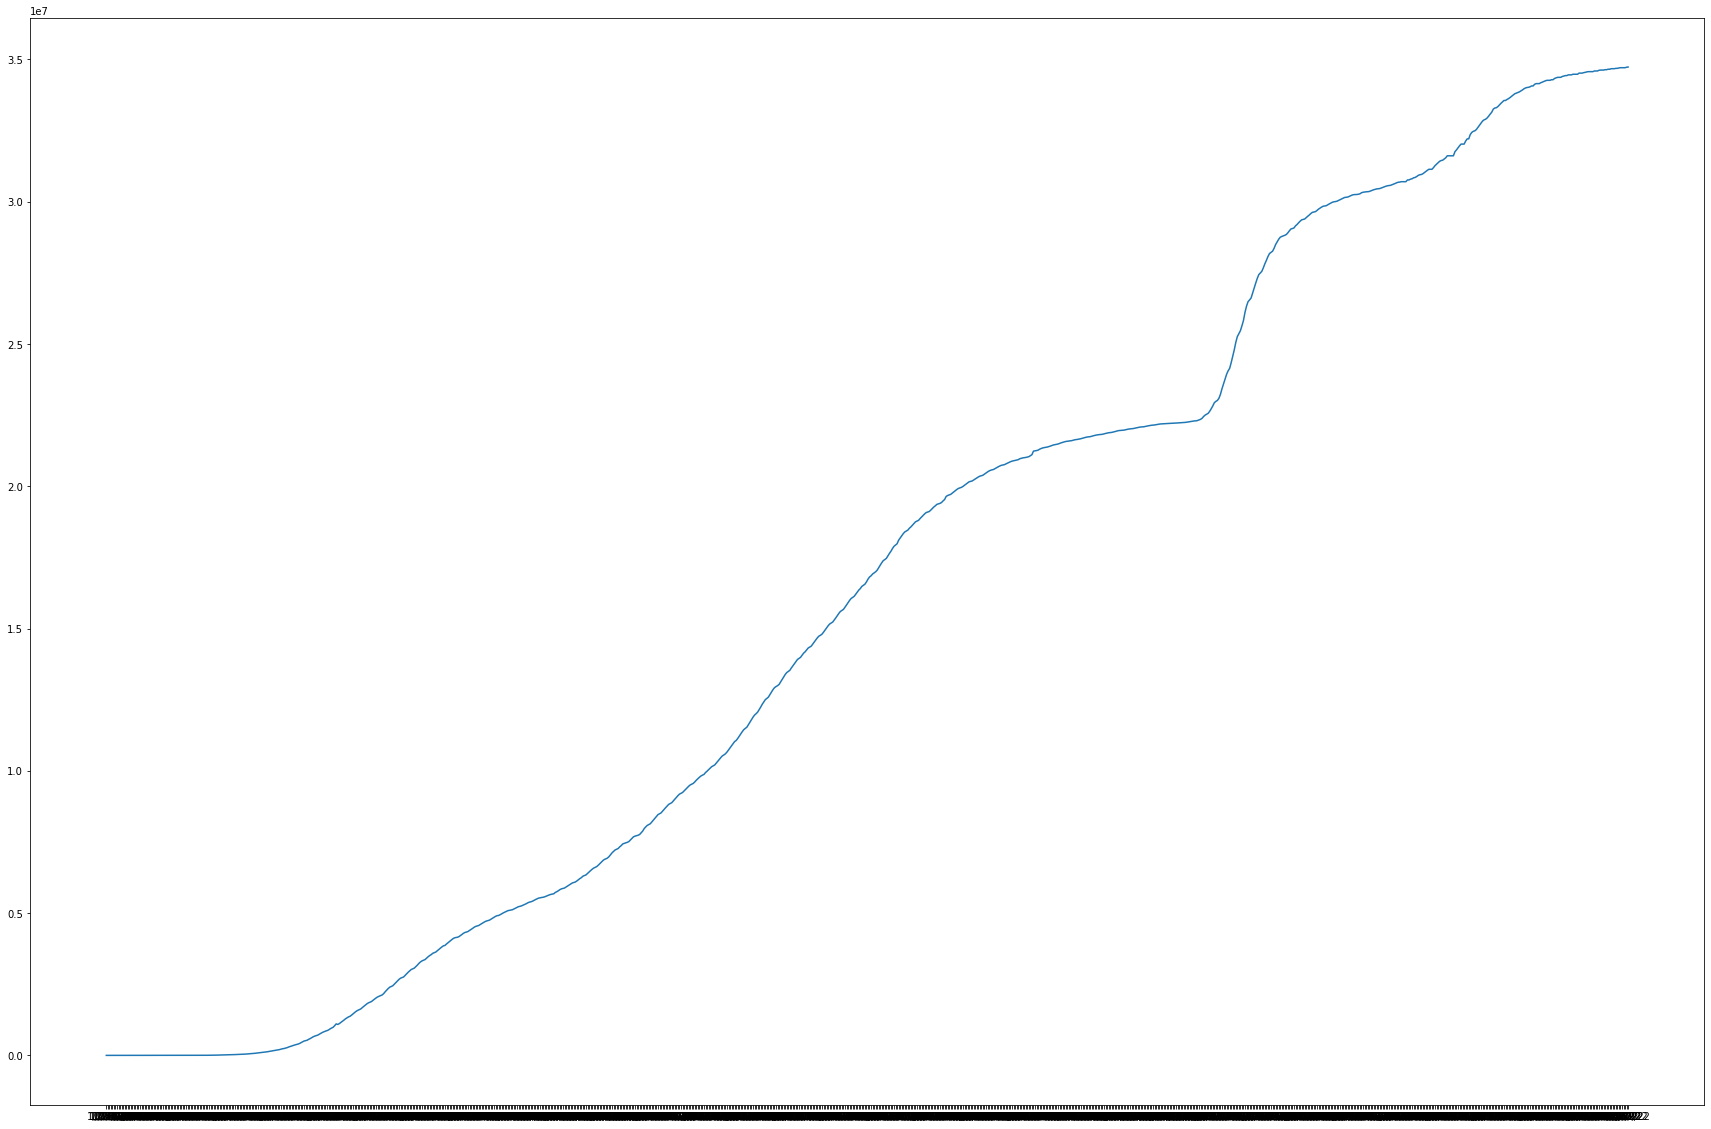

In [ ]:
plt.figure(figsize=(30, 20))
plt.plot(datas_brazil, casos_brazil)

In [ ]:
s_brazil = df.loc['Brazil']
s_brazil

1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
              ...   
10/7/22     34707233
10/8/22     34707233
10/9/22     34707233
10/10/22    34724189
10/11/22    34731539
Name: Brazil, Length: 994, dtype: int64

In [ ]:
s_brazil = s_brazil[s_brazil > 0]

In [ ]:
s_brazil

2/26/20           1
2/27/20           1
2/28/20           1
2/29/20           2
3/1/20            2
             ...   
9/19/22    34592163
9/20/22    34592027
9/21/22    34592027
9/22/22    34616655
9/23/22    34624427
Name: Brazil, Length: 941, dtype: int64

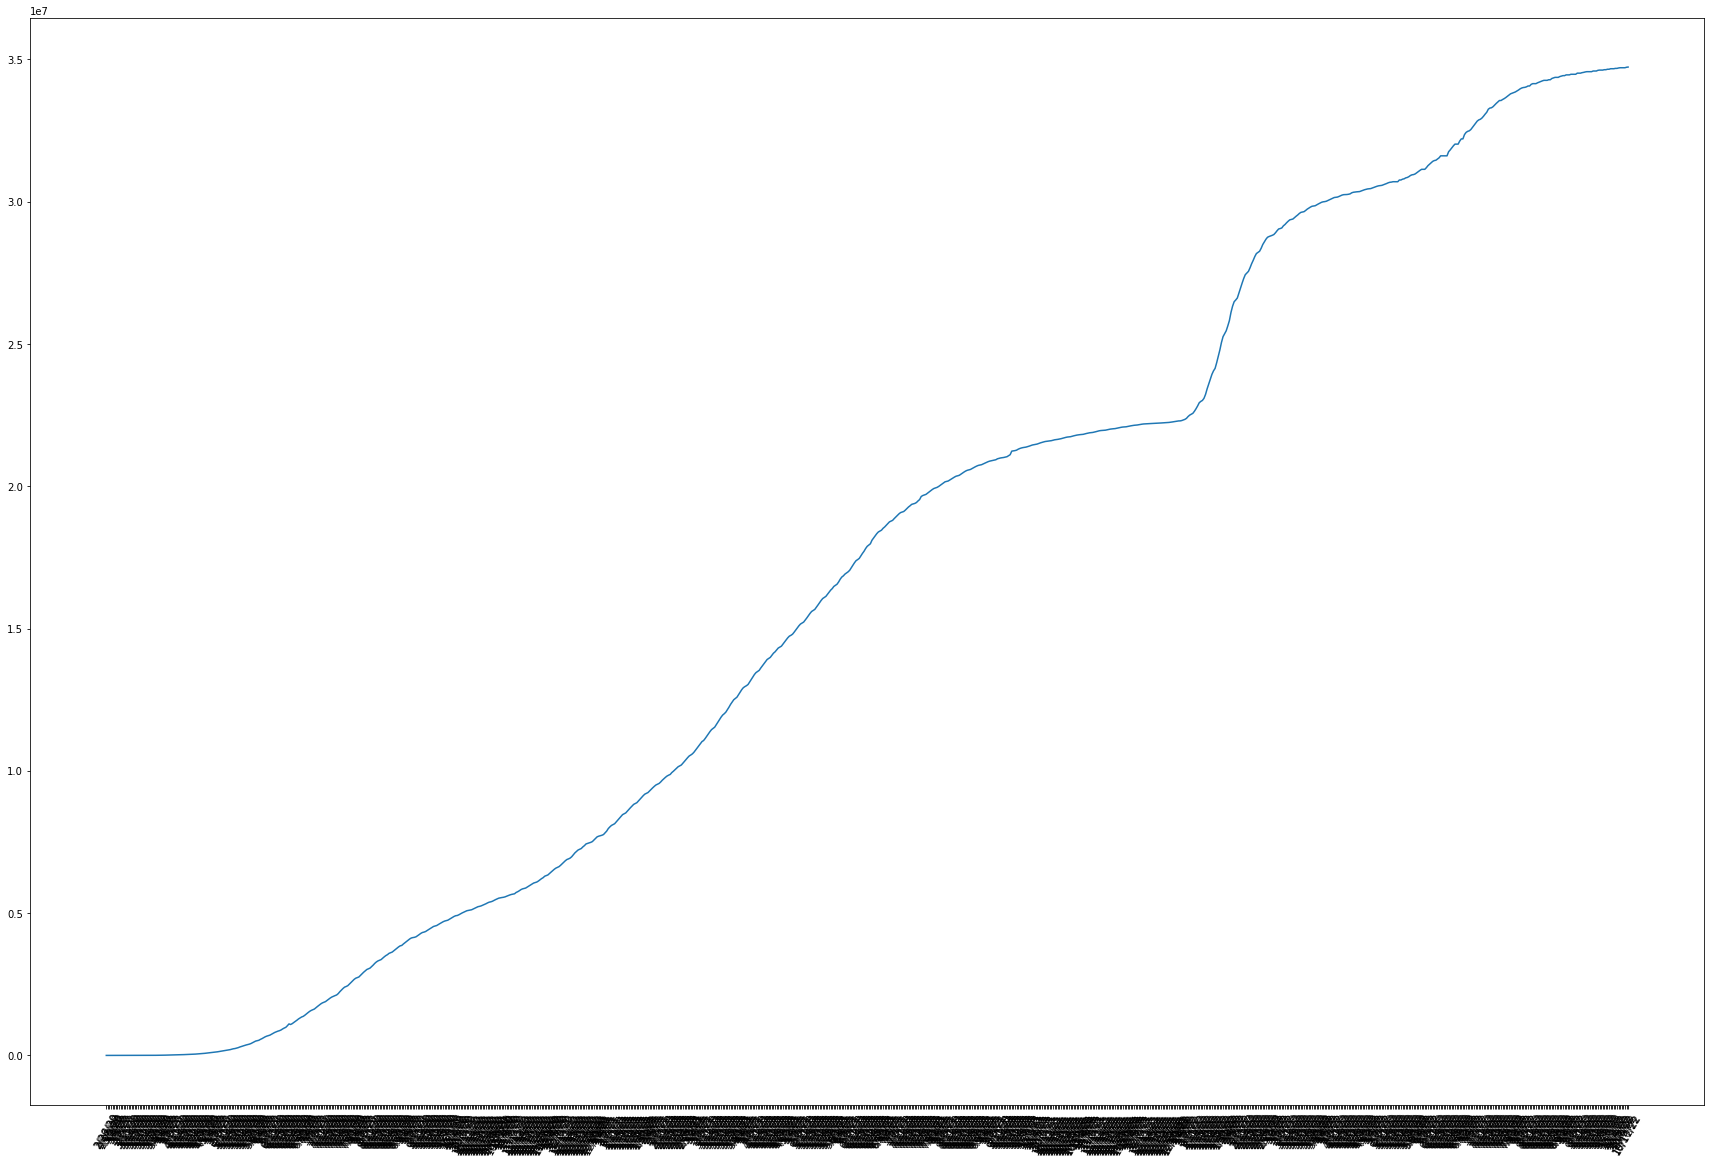

In [ ]:
plt.figure(figsize=(30, 20))
plt.xticks(rotation=60)
plt.plot(s_brazil.index, s_brazil.values)